# Reproducing the Experiment in "Prediction of Pedestrian Speed with Artificial Neural Networks" by Tordeux et al.

In [1]:
# Enable these if automatic reloading of modules is wanted

# Load extension for automatic reload of modules
%load_ext autoreload
# Enable autoreload for all modules
%autoreload 2

In [2]:
import numpy as np
import torch
from torch.utils.data import DataLoader
import logging

import preprocessing
import plotting
import pedestrian_dataset

## Logging

I used Logging to print messages.
If more messages are welcome, use the logging level `logging.INFO` or even `logging.DEBUG`.
If not, use `logging.WARNING`.

In [3]:
# Set Logging Level
logger_format = '%(levelname)s - %(funcName)s \t%(message)s'
logger_level = logging.WARNING
logging.basicConfig(level=logger_level, format=logger_format)

## Preprocessing and Loading the Dataset

The different files of data in the format
(`PedID FrameID X Y Z`)
are loaded and converted into the following dictionary format:

`distances` | `speeds`
-|-
Input of our neural network. Array of size $2k+1$ containing the median speed of the $k$ nearest neighbors as the first element and the relative $x$- and $y$-positions of the $k$ nearest neighbors in the following pattern afterwards: $x_1$, $y_1$, $x_2$, $y_2$, ... | Truth value for our neural network. The speed that the pedestrian had in that frame.

To load a list of files, the method `pedestrian_dataset.create_dataset()` is used.
As its first parameter it either takes a list of data files that it should load
or a `pedestrian_dataset.PedestrianDataType` value,
which can be either `BOTTLENECK`, which loads all bottleneck files,
`CORRIDOR`, which loads all corridor files,
or `ALL`, which loads all files.

Note: Docstrings for the rest of the functions will be added before the final deadline (and imports cleaned up etc.). The most important docstring for `create_dataset()` is already created.

In [4]:
# Creating datasets with only the smallest corridor scenario with 30 participants
c_015_path = "./Data/Corridor_Data/ug-180-030.txt"
# Note: even when only loading one dataset, it has to be given in a list
c_015_train_val_datasets, c_015_test_dataset = pedestrian_dataset.create_dataset([c_015_path])

# Print the first item from the first train/val dataset part
print(c_015_train_val_datasets[0][0])

{'distances': array([ 296.80893951,   36.1585    ,  -91.69      ,   76.8931    ,
         62.0273    ,   -2.372     ,  201.1667    ,  -21.5438    ,
       -241.436     ,   29.8531    , -262.229     ,   32.8202    ,
        295.624     ,  -18.6053    ,  316.108     ,  -26.2509    ,
        437.719     ,   43.2941    ,  445.954     ,   -0.6295    ,
        559.384     ]), 'speed': 6.112364455756874}


In [5]:
# Create a PyTorch dataloader with the dataset

# TODO: I don't know how to do cross validation, so we combine the first 4 train/val datasets
#   to build the train dataset and use the last train/val dataset as the val dataset
#   Maybe we just have to do this everytime (and switch it up)? Could be, but not sure
c_015_temp_train_dataset = torch.utils.data.ConcatDataset(c_015_train_val_datasets[:4])
c_015_temp_val_dataset = c_015_train_val_datasets[4]

c_015_train_loader = DataLoader(c_015_temp_train_dataset)
c_015_val_loader = DataLoader(c_015_temp_train_dataset)

# Print the first value given by the train loader
for item in c_015_train_loader:
    print(item)
    break  # break after printing the first item

{'distances': tensor([[ 296.8089,   36.1585,  -91.6900,   76.8931,   62.0273,   -2.3720,
          201.1667,  -21.5438, -241.4360,   29.8531, -262.2290,   32.8202,
          295.6240,  -18.6053,  316.1080,  -26.2509,  437.7190,   43.2941,
          445.9540,   -0.6295,  559.3840]], dtype=torch.float64), 'speed': tensor([6.1124], dtype=torch.float64)}


In [6]:
# Creating datasets with all scenarios loaded
all_train_val_datasets, all_test_dataset = pedestrian_dataset.create_dataset(
    pedestrian_dataset.PedestrianDataType.ALL
)

# Print the first item from the first train/val dataset part
print(all_train_val_datasets[0][0])

{'distances': array([ 83.28914988, -32.428     ,  24.169     ,  37.9846    ,
        38.714     ,  -2.5528    , -57.585     ,   4.0326    ,
        69.008     ,  81.5544    ,   6.506     , -71.6767    ,
       -54.426     ,  49.6994    , -84.303     , -57.71222   ,
        80.09      ,  86.0264    , -55.428     ,  80.5664    ,
        75.733     ]), 'speed': 2.5783409394414765}


In [7]:
# Create a PyTorch dataloader with the dataset

# TODO: I don't know how to do cross validation, so we combine the first 4 train/val datasets
#   to build the train dataset and use the last train/val dataset as the val dataset
#   Maybe we just have to do this everytime (and switch it up)? Could be, but not sure
all_temp_train_dataset = torch.utils.data.ConcatDataset(all_train_val_datasets[:4])
all_temp_val_dataset = all_train_val_datasets[4]

all_train_loader = DataLoader(all_temp_train_dataset)
all_val_loader = DataLoader(all_temp_train_dataset)

# Print the first value given by the train loader
for item in all_train_loader:
    print(item)
    break  # break after printing the first item

{'distances': tensor([[ 83.2891, -32.4280,  24.1690,  37.9846,  38.7140,  -2.5528, -57.5850,
           4.0326,  69.0080,  81.5544,   6.5060, -71.6767, -54.4260,  49.6994,
         -84.3030, -57.7122,  80.0900,  86.0264, -55.4280,  80.5664,  75.7330]],
       dtype=torch.float64), 'speed': tensor([2.5783], dtype=torch.float64)}


## Model Stuff - TODO

Now we need to import our model.



Note: Parim already has done some work here

Predicted speed: -0.06459915637969971


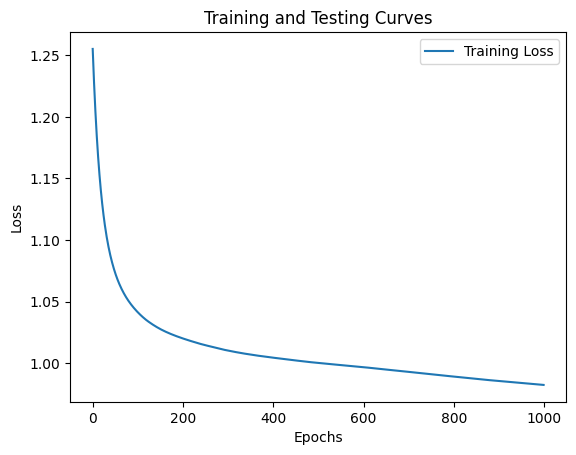

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

# Define the neural network class
class PedestrianSpeedNN(nn.Module):
    def __init__(self, num_inputs, hidden_size):
        super(PedestrianSpeedNN, self).__init__()
        self.fc1 = nn.Linear(num_inputs, hidden_size)
        self.fc2 = nn.Linear(hidden_size, 1)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Set the random seed for reproducibility
torch.manual_seed(42)

# Create an instance of the neural network
K = 10
num_inputs = 2 * K + 1  # Number of inputs: mean spacing + K relative positions
hidden_size = 3  # Number of nodes in the hidden layer
model = PedestrianSpeedNN(num_inputs, hidden_size)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Generate sample input data and target labels
num_samples = 1000
X = torch.randn(num_samples, num_inputs)
y = torch.randn(num_samples, 1)

# Initialize lists to store training and testing losses
train_losses = []
# test_losses = []

# Create a data loader for batch training
batch_size = 1000
dataset = TensorDataset(X, y)
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Training loop
for epoch in range(1000):
    running_loss = 0.0
    
    for i, data in enumerate(data_loader, 0):
        batch_input, batch_target = data
        
        optimizer.zero_grad()
        output = model(batch_input)
        loss = criterion(output, batch_target)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        
#         # Print statistics to console
#         if i % 125 == 0: # print every 1000 mini-batches
#             running_loss /= 1000
#             print("[Epoch %d, Iteration %5d] loss: %.3f" % (epoch+1, i+1, running_loss))
#             train_losses.append(running_loss)
#             running_loss = 0.0
        
    # Calculate training loss
    
    train_losses.append(running_loss)
    
#     # Calculate testing loss
#     y_test_pred = model.predict(X_test)
#     test_loss = np.mean((y_test_pred - y_test) ** 2)
#     test_losses.append(test_loss)
        
    # Print progress
#     if (epoch+1) % 10 == 0:
#         print(f"Epoch: {epoch+1}, Loss: {loss.item()}")

# Example usage to predict pedestrian speed
test_input = torch.randn(1, num_inputs)
predicted_speed = model(test_input)
print(f"Predicted speed: {predicted_speed.item()}")


# Plot the training and testing curves
# epochs = range(1, max_iter + 1)
plt.plot(train_losses, label='Training Loss')
# plt.plot(100, test_losses, label='Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Curves')
plt.legend()
plt.show()